In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle
import keras
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("data\Student_performance_data.csv")
X = df.drop(['GradeClass', 'StudentID', 'GPA'], axis=1)
y = df['GradeClass']

scaler = StandardScaler()
num_features = ['Age', 'StudyTimeWeekly', 'Absences']
X[num_features] = scaler.fit_transform(X[num_features])
with open ('scaler.pkl', 'wb') as f: 
    pickle.dump(scaler, f)

with open ('features.pkl', 'wb') as f: 
    pickle.dump(X.columns.tolist(), f)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\user-pc\AppData\Local\Temp\ipykernel_21296\3346806562.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("data\Student_performance_data.csv")


In [3]:
y_trainDL = to_categorical(y_train)
y_testDL = to_categorical(y_test)
DL_model = Sequential()
DL_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu')) 
DL_model.add(Dense(64, activation='relu'))
DL_model.add(Dense(5, activation='softmax'))  

c:\Users\user-pc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

DL_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = DL_model.fit(X_train, y_trainDL,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    validation_data= (X_test, y_testDL))

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4413 - loss: 1.3713 - val_accuracy: 0.6075 - val_loss: 1.0165
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - loss: 0.9492 - val_accuracy: 0.6347 - val_loss: 0.9163
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7006 - loss: 0.8785 - val_accuracy: 0.6722 - val_loss: 0.8785
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7119 - loss: 0.8595 - val_accuracy: 0.6701 - val_loss: 0.8841
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - loss: 0.8480 - val_accuracy: 0.6931 - val_loss: 0.8605
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 0.7850 - val_accuracy: 0.6952 - val_loss: 0.8495
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7473 - loss: 0.7721 - val_accuracy: 0.6764 - val_loss: 0.8637
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.7540 - val_accuracy: 0.7015 - val_loss:

In [6]:
loss, accuracy = DL_model.evaluate(X_test, y_testDL)
print(f"Test Accuracy: {accuracy:.2f}")
y_predDL = DL_model.predict(X_test)
y_predClass = np.argmax(y_predDL, axis=1)
print(classification_report(y_test, y_predClass))
print(confusion_matrix(y_test, y_predClass))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 1.0318 
Test Accuracy: 0.72
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

         0.0       0.67      0.18      0.29        22
         1.0       0.51      0.53      0.52        49
         2.0       0.54      0.58      0.56        85
         3.0       0.56      0.52      0.54        86
         4.0       0.88      0.93      0.90       237

    accuracy                           0.72       479
   macro avg       0.63      0.55      0.56       479
weighted avg       0.71      0.72      0.71       479

[[  4   9   5   2   2]
 [  1  26  17   1   4]
 [  1  12  49  17   6]
 [  0   3  19  45  19]
 [  0   1   1  15 220]]


In [7]:
keras.models.save_model(DL_model, "artifacts\deep_learning_model.h5")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user-pc\AppData\Local\Temp\ipykernel_21296\3117395165.py:1: SyntaxWarning: invalid escape sequence '\d'
  keras.models.save_model(DL_model, "artifacts\deep_learning_model.h5")


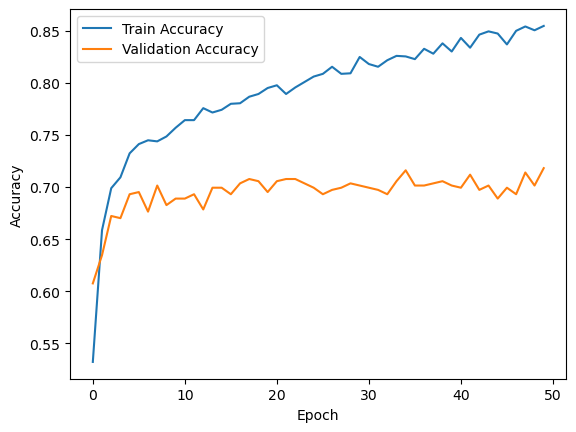

In [8]:


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()